In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving Coffe_sales.csv to Coffe_sales.csv


In [ ]:
df = pd.read_csv('Coffe_sales.csv')
df.head()

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.7,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000
1,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000
2,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000
3,13,card,28.9,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33.006000
4,13,card,38.7,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14.626000


In [ ]:
# rename columns
df.rename(columns = {'hour_of_day': 'hour',
                     'cash_type': 'payment_method',
                     'money': 'amount',
                     'coffee_name': 'product_name',
                     'Time_of_Day': 'time_of_day',
                     'Weekday': 'day',
                     'Month_name': 'month',
                     'Weekdaysort': 'weekday_num',
                     'Monthsort': 'month_num',
                     'Date': 'date',
                     'Time': 'time',
                     }, inplace = True)

In [ ]:
df.columns

Index(['hour', 'payment_method', 'amount', 'product_name', 'time_of_day',
       'day', 'month', 'weekday_num', 'month_num', 'date', 'time'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3547 entries, 0 to 3546
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   hour            3547 non-null   int64  
 1   payment_method  3547 non-null   object 
 2   amount          3547 non-null   float64
 3   product_name    3547 non-null   object 
 4   time_of_day     3547 non-null   object 
 5   day             3547 non-null   object 
 6   month           3547 non-null   object 
 7   weekday_num     3547 non-null   int64  
 8   month_num       3547 non-null   int64  
 9   date            3547 non-null   object 
 10  time            3547 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 304.9+ KB


In [ ]:
df.describe(include='all')

,hour,payment_method,amount,product_name,time_of_day,day,month,weekday_num,month_num,date,time
count,3547.000000,3547,3547.000000,3547,3547,3547,3547,3547.000000,3547.000000,3547,3547
unique,NaN,1,NaN,8,3,7,12,NaN,NaN,381,3547
top,NaN,card,NaN,Americano with Milk,Afternoon,Tue,Mar,NaN,NaN,2024-10-11,18:11:38.635000
freq,NaN,3547,NaN,809,1205,572,494,NaN,NaN,26,1
mean,14.185791,NaN,31.645216,NaN,NaN,NaN,NaN,3.845785,6.453905,NaN,NaN
std,4.234010,NaN,4.877754,NaN,NaN,NaN,NaN,1.971501,3.500754,NaN,NaN
min,6.000000,NaN,18.120000,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN
25%,10.000000,NaN,27.920000,NaN,NaN,NaN,NaN,2.000000,3.000000,NaN,NaN
50%,14.000000,NaN,32.820000,NaN,NaN,NaN,NaN,4.000000,7.000000,NaN,NaN
75%,18.000000,NaN,35.760000,NaN,NaN,NaN,NaN,6.000000,10.000000,NaN,NaN


In [ ]:
df.duplicated().any()

np.False_

In [ ]:
df.isnull().sum()

,0
hour,0
payment_method,0
amount,0
product_name,0
time_of_day,0
day,0
month,0
weekday_num,0
month_num,0
date,0


In [ ]:
df.shape

(3547, 11)

In [ ]:
df.head()

,hour,payment_method,amount,product_name,time_of_day,day,month,weekday_num,month_num,date,time
0,10,card,38.7,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000
1,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000
2,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000
3,13,card,28.9,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33.006000
4,13,card,38.7,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14.626000


In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency

# Put the days in the correct order
day_order = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
if 'day' in df.columns:
    df['day'] = pd.Categorical(df['day'], categories=day_order, ordered=True)

# product and Day frequency table
ct = pd.crosstab(df['product_name'], df['day'])

# Chi-square testi
chi2, p, dof, expected = chi2_contingency(ct, correction=False)

# Cramer's V
n = ct.values.sum()
k = min(ct.shape) - 1
cramers_v = np.sqrt(chi2 / (n * k))

print(f"Chi2 = {chi2:.2f}, df = {dof}, p-value = {p:.4g}, Cramér's V = {cramers_v:.3f}")

# Post-hoc: adjusted residuals
expected_df = pd.DataFrame(expected, index=ct.index, columns=ct.columns)
row_tot = ct.sum(axis=1).values.reshape(-1,1)
col_tot = ct.sum(axis=0).values.reshape(1,-1)

adj_resid = (ct - expected_df) / np.sqrt(
    expected_df * (1 - row_tot/n) * (1 - col_tot/n)
)
# |adj_resid| >= 2
sig_cells = (adj_resid.abs() >= 2)

# summary: Which product standart out on which day?
hotspots = []
for i, prod in enumerate(ct.index):
    for j, d in enumerate(ct.columns):
        if sig_cells.iloc[i, j]:
            hotspots.append((prod, d, adj_resid.iloc[i, j]))
hotspots[:10]  # first 10


Chi2 = 99.66, df = 42, p-value = 1.372e-06, Cramér's V = 0.068


[('Americano', 'Fri', np.float64(2.6243727480586587)),
 ('Americano', 'Sun', np.float64(-2.934013513973944)),
 ('Americano with Milk', 'Fri', np.float64(-2.055263022389866)),
 ('Cappuccino', 'Tue', np.float64(-2.0411868289088746)),
 ('Cocoa', 'Tue', np.float64(3.361679983670979)),
 ('Cocoa', 'Thu', np.float64(-2.1694189701988447)),
 ('Cocoa', 'Fri', np.float64(3.0302169461148827)),
 ('Cortado', 'Sat', np.float64(3.2635769319485446)),
 ('Espresso', 'Mon', np.float64(-2.4354384394593445)),
 ('Espresso', 'Thu', np.float64(2.1605253582099597))]

#EDA(Exploratory Data Analysis)


In [ ]:
# 1000 select random index
random_idx = np.random.choice(df.index, size=1000, replace=False)

# doing cash
df.loc[random_idx,"payment_method"] = "cash"

# control
print(df["payment_method"].value_counts())

payment_method
card    2547
cash    1000
Name: count, dtype: int64


In [ ]:
df.groupby('payment_method')['amount'].sum()

,amount
payment_method,
card,80701.54
cash,31544.04


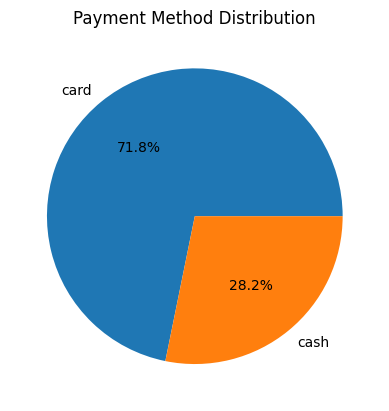

In [ ]:
df.groupby('payment_method').size().plot(kind='pie', autopct='%1.1f%%' ,ylabel="")
plt.title("Payment Method Distribution")
plt.show()

In [ ]:
df.groupby('product_name')['amount'].sum()

,amount
product_name,
Americano,14650.26
Americano with Milk,24751.12
Cappuccino,17439.14
Cocoa,8521.16
Cortado,7384.86
Espresso,2690.28
Hot Chocolate,9933.46
Latte,26875.30


In [ ]:
print(df.columns.tolist())


['hour', 'payment_method', 'amount', 'product_name', 'time_of_day', 'day', 'month', 'weekday_num', 'month_num', 'date', 'time']


/tmp/ipython-input-750266073.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df["product_name"].value_counts().index,y=df["product_name"].value_counts().values,palette="viridis")


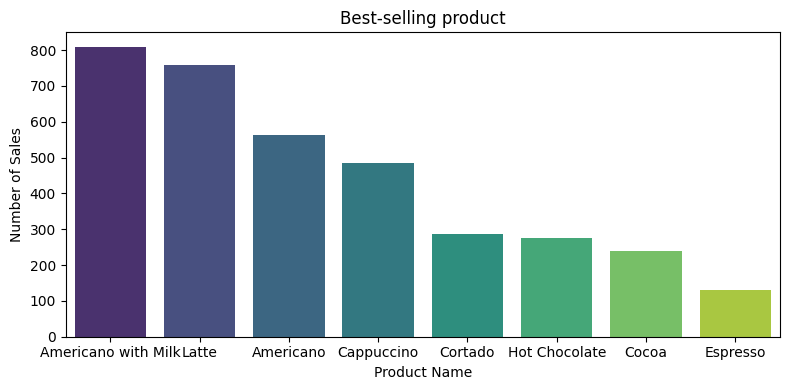

In [ ]:
# 1.Best Selling Coffee Chart
fig, ax = plt.subplots(figsize=(8, 4))
sns.barplot(x=df["product_name"].value_counts().index,y=df["product_name"].value_counts().values,palette="viridis")
plt.xlabel("Product Name")
plt.ylabel("Number of Sales")
plt.title("Best-selling product") # customer preference
plt.tight_layout()
plt.show()

In [ ]:
df['product_name'].value_counts()

,count
product_name,
Americano with Milk,809
Latte,757
Americano,564
Cappuccino,486
Cortado,287
Hot Chocolate,276
Cocoa,239
Espresso,129


In [ ]:
df.groupby('product_name')['amount'].sum().sort_values(ascending=False)

,amount
product_name,
Latte,26875.30
Americano with Milk,24751.12
Cappuccino,17439.14
Americano,14650.26
Hot Chocolate,9933.46
Cocoa,8521.16
Cortado,7384.86
Espresso,2690.28


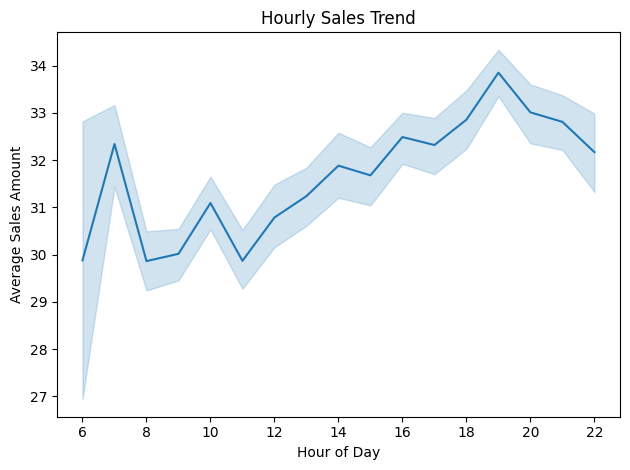

In [ ]:
#2.saatlik satis yogunlugu
sns.lineplot(x="hour", y="amount", data=df)
plt.title("Hourly Sales Trend")
plt.xlabel("Hour of Day")
plt.ylabel("Average Sales Amount")
plt.tight_layout()
plt.show()

In [ ]:
df["datetime"] = pd.to_datetime(df["date"] + " " + df["time"], format="%Y-%m-%d %H:%M:%S", errors="coerce")
df

,hour,payment_method,amount,product_name,time_of_day,day,month,weekday_num,month_num,date,time,datetime
0,10,card,38.70,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000,NaT
1,12,card,38.70,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000,NaT
2,12,card,38.70,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000,NaT
3,13,card,28.90,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33.006000,NaT
4,13,cash,38.70,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14.626000,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...
3542,10,cash,35.76,Cappuccino,Morning,Sun,Mar,7,3,2025-03-23,10:34:54.894000,NaT
3543,14,cash,35.76,Cocoa,Afternoon,Sun,Mar,7,3,2025-03-23,14:43:37.362000,NaT
3544,14,cash,35.76,Cocoa,Afternoon,Sun,Mar,7,3,2025-03-23,14:44:16.864000,NaT
3545,15,card,25.96,Americano,Afternoon,Sun,Mar,7,3,2025-03-23,15:47:28.723000,NaT


<Axes: title={'center': 'Daily Sales Trend'}, xlabel='datetime'>

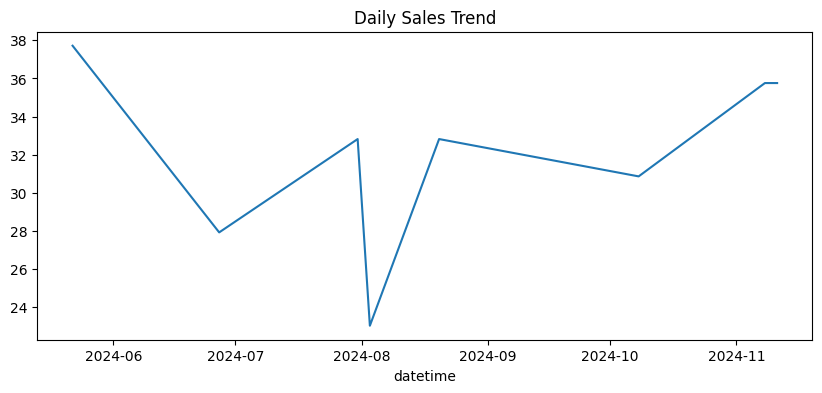

In [ ]:
#aylara gore gunluk satis trendi
daily_sales = df.groupby(df["datetime"].dt.date)["amount"].sum()
daily_sales.plot(kind="line", figsize=(10,4), title="Daily Sales Trend")


The plot shows the change in daily/monthly sales over time. Sales are high in June, drop in July and especially in August, then recover strongly in September and rise again by November. These changes may be due to missing data, seasonal (holiday) effects, or local promotions. To be sure, we should check transaction counts per month, holiday calendars, and moving averages. The findings can help plan stock and staff for busy and slow periods.(aciklamayla bunu data kisminda rapora ekle)

/tmp/ipython-input-536503895.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df.resample('M', on='datetime')['amount'].sum()


<Axes: title={'center': 'Monthly Sales'}, xlabel='datetime'>

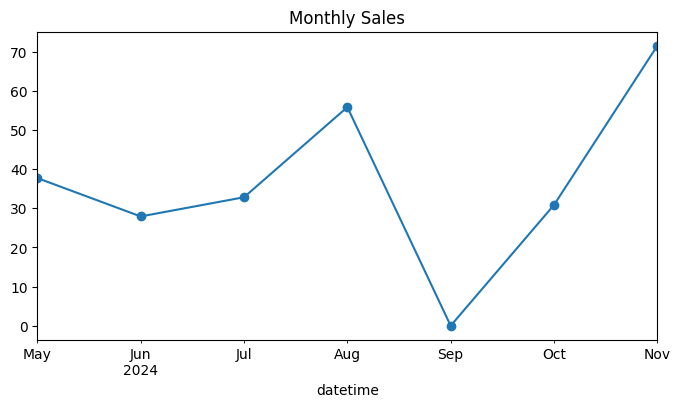

In [ ]:
monthly = df.resample('M', on='datetime')['amount'].sum()
monthly.plot(marker='o', title='Monthly Sales', figsize=(8,4))


In [ ]:
df['datetime'] = pd.to_datetime(df['datetime'])
print(df.groupby(df['datetime'].dt.to_period('M')).size())


datetime
2024-05    1
2024-06    1
2024-07    1
2024-08    2
2024-10    1
2024-11    2
Freq: M, dtype: int64


<Axes: title={'center': 'Daily Sales (7-day MA)'}, xlabel='datetime'>

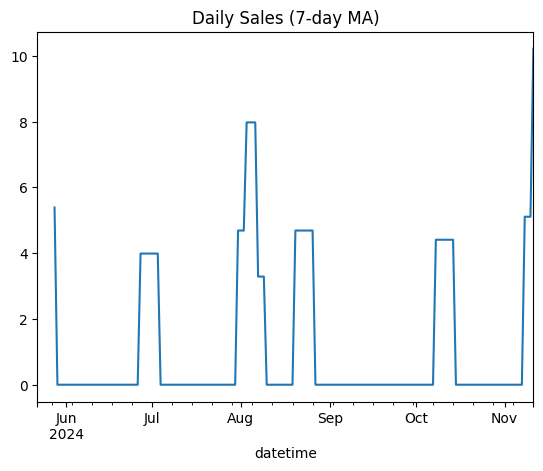

In [ ]:
daily = df.resample('D', on='datetime')['amount'].sum()
daily.rolling(7).mean().plot(title='Daily Sales (7-day MA)')


In [ ]:
#day colomn
df.groupby('day')['amount'].sum().sort_values(ascending=False)


,amount
day,
Tue,18168.38
Mon,17363.10
Fri,16802.66
Thu,16091.40
Wed,15750.46
Sat,14733.52
Sun,13336.06


In [ ]:
df.groupby('day')['amount'].mean().sort_values(ascending=False)

,amount
day,
Mon,31.917463
Sun,31.828305
Tue,31.762902
Fri,31.583947
Thu,31.551765
Wed,31.500920
Sat,31.347915


/tmp/ipython-input-1829418750.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="day",y="amount", data=df, estimator="sum", ci=None)


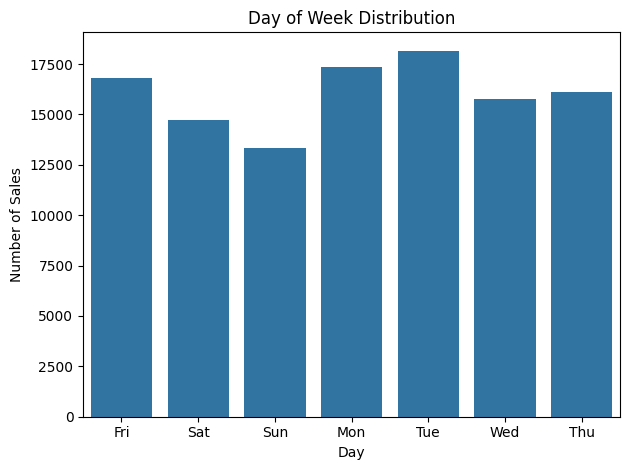

In [ ]:
# Sales distribution by day
sns.barplot(x="day",y="amount", data=df, estimator="sum", ci=None)
plt.xlabel("Day")
plt.ylabel("Number of Sales")
plt.title("Day of Week Distribution")
plt.tight_layout()
plt.show()

In [ ]:

df.groupby('day')['amount'].sum().sort_values(ascending=False).reset_index()

,day,amount
0,Tue,18168.38
1,Mon,17363.10
2,Fri,16802.66
3,Thu,16091.40
4,Wed,15750.46
5,Sat,14733.52
6,Sun,13336.06


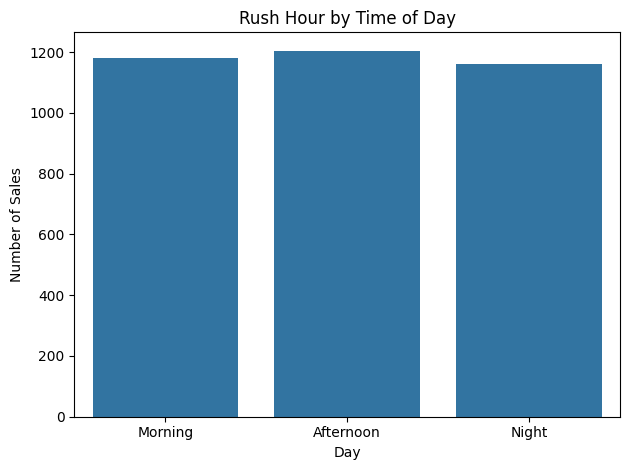

In [ ]:
#Sales distribution by day

sns.countplot(data=df,x='time_of_day')
plt.xlabel("Day")
plt.ylabel("Number of Sales")
plt.title('Rush Hour by Time of Day')
plt.tight_layout()
plt.show()

<Axes: title={'center': 'Most Bought Coffee'}, ylabel='count'>

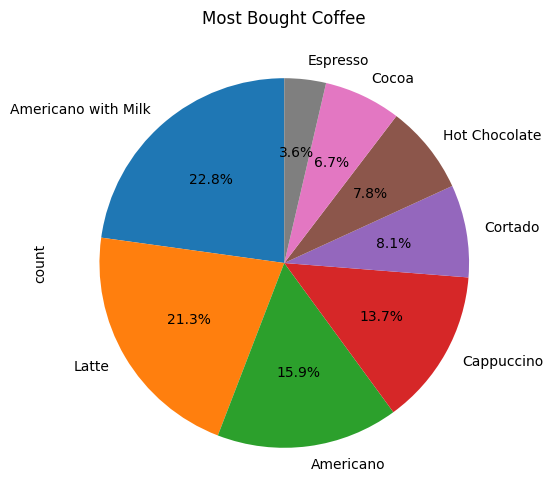

In [ ]:
df["product_name"].value_counts().plot(kind="pie",startangle=90,autopct="%1.1f%%",title="Most Bought Coffee",figsize=(6,6))


In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols("amount ~ C(day)", data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)


                sum_sq      df        F    PR(>F)
C(day)      120.692276     6.0  0.84523  0.534789
Residual  84247.446034  3540.0      NaN       NaN


#  How to interpret the p-value?

p < 0.05 → The difference is statistically significant.
This means that the sales truly differ depending on the day of the month.

p ≥ 0.05 → The difference is not statistically significant.
This means that the differences you see between, for example, day 1 and day 15 might just be due to random variation..
